# Name: Priti Chauhan
Batch no: 1845

In this project, I will use machine learning models to predict average price of avocado.

**The dataset consists of the information about HASS Avocado. Historical data on avocado prices and sales volume in multiple US markets. Various variables present in the dataset includes Date, AveragePrice,Total Volume, Total Bags,Year,Type etc.
The dataset comprises of 18249 observations of 14 columns. Below is a table showing names of all the columns and their description

Agenda:

importing the data
cleaning and preparing the data
exploring and visualizing the data
splitting dataset into train_set and test_set
selecting error metric: mean absolute error vs mean squared error
linear regression model
ridge regression model
decision tree regression model
extra tree regression model
random forest regression model
lasso regression model
model saving

In [4]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
#to read the data
df = pd.read_csv('avocado.csv')

In [6]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# Data understanding

In [8]:
#to see first five rows
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [10]:
df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
6889,1,24-12-2017,1.45,506569.10,336796.77,44094.52,4987.95,120689.86,88550.58,32139.28,0.00,conventional,2017,MiamiFtLauderdale
11418,4,29-11-2015,1.71,3543.38,369.89,1185.76,348.82,1638.91,1472.43,166.48,0.00,organic,2015,SouthCarolina
13424,35,24-04-2016,2.11,50334.94,4483.15,15498.30,2803.92,27549.57,27093.07,456.50,0.00,organic,2016,NewYork
17175,49,22-01-2017,1.02,147163.14,28151.07,6856.25,0.00,112155.82,107713.44,4442.38,0.00,organic,2017,SouthCentral
7483,12,08-10-2017,1.81,1248620.90,579778.92,278087.93,5387.88,385366.17,285269.57,100043.45,53.15,conventional,2017,Plains


In [11]:
df.shape

(18249, 14)

In [12]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [13]:
# Missing Values
df.isnull()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# Missing Values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [16]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [17]:
df['AveragePrice'].describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

In [18]:
df['region'].describe()

count      18249
unique        54
top       Albany
freq         338
Name: region, dtype: object

# EDA - Exploratory data analysis and Visualizing data

Text(0.5, 1.0, 'histogram of AveragePrice')

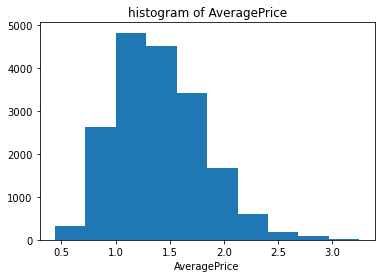

In [19]:
plt.hist(df['AveragePrice'])
plt.xlabel('AveragePrice')
plt.title('histogram of AveragePrice')

 Average Price distribution shows that for most cases price of avocado is between 1.1, 1.4.

Text(0.5, 1.0, 'histogram of region')

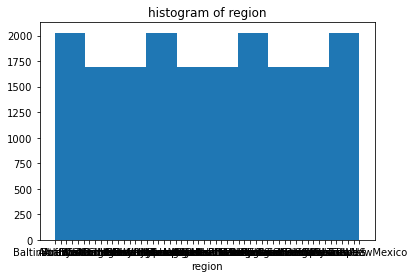

In [20]:
plt.hist(df['region'])
plt.xlabel('region')
plt.title('histogram of region')

In [21]:
#check out the average wins
df['AveragePrice'].mean()

1.4059784097758825

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

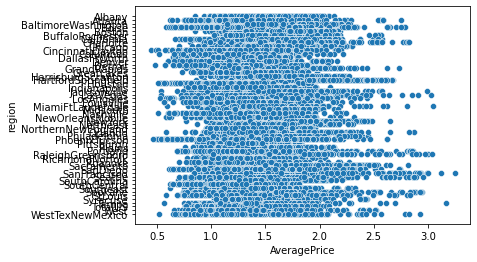

In [22]:
#scatterplot
sns.scatterplot(x='AveragePrice',y='region',data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

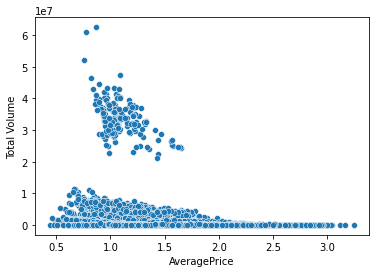

In [25]:
#scatterplot
sns.scatterplot(x='AveragePrice',y='Total Volume',data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Bags'>

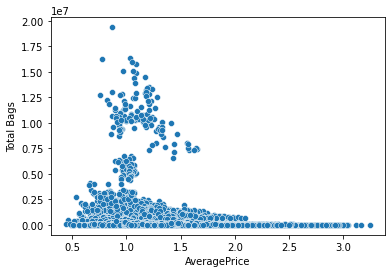

In [26]:
sns.scatterplot(x='AveragePrice',y='Total Bags',data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='year'>

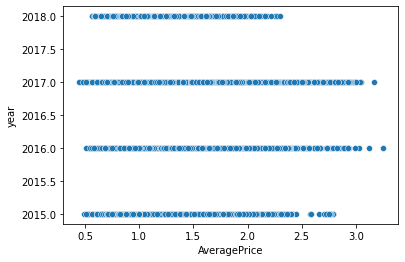

In [27]:
sns.scatterplot(x='AveragePrice',y='year',data=df)

average price vs year data are quite correlates with each other

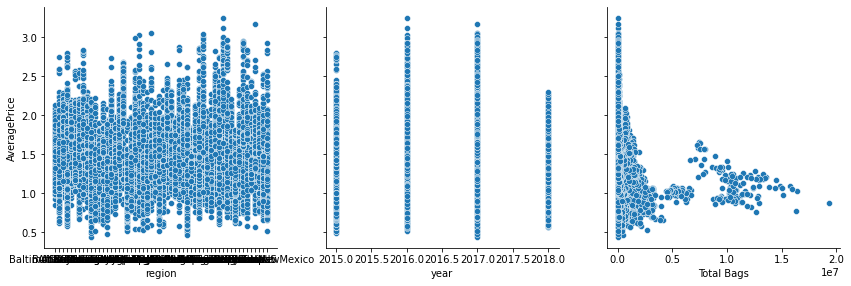

In [28]:
# Let's see how AveragePrice is related with other variables using scatter plot.
sns.pairplot(df, x_vars=['region', 'year', 'Total Bags'], y_vars='AveragePrice', height=4, aspect=1, kind='scatter')
plt.show()

<AxesSubplot:xlabel='region'>

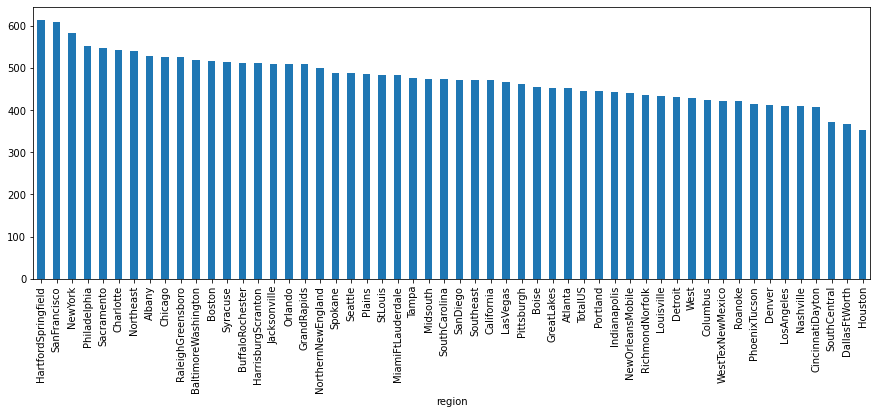

In [29]:
df.groupby("region")["AveragePrice"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

In [30]:
#correlation
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [31]:
df.corr()['AveragePrice'].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
Unnamed: 0     -0.133008
XLarge Bags    -0.117592
year            0.093197
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

<AxesSubplot:>

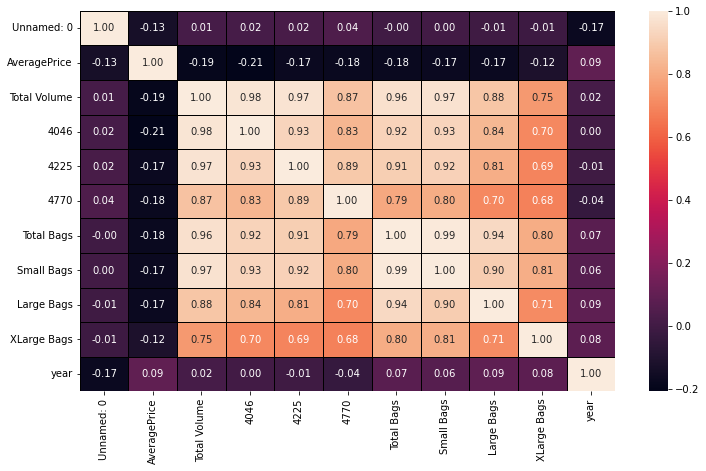

In [32]:
#correlation using heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True, linewidths=0.5, linecolor= 'black', fmt='.2f')

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

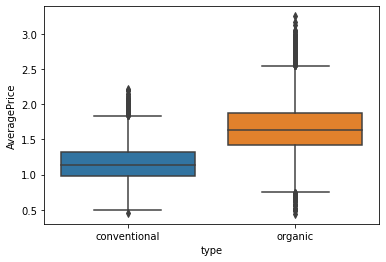

In [33]:
sns.boxplot(x="type", y="AveragePrice", data=df)

oraganic avocados are more expensive than conventional

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

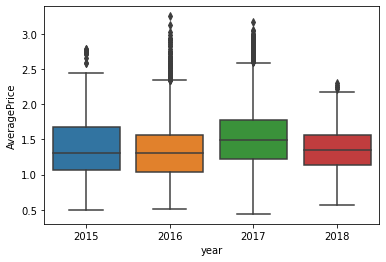

In [34]:
sns.boxplot(x="year", y="AveragePrice", data=df)

avacados' average price is high in 2017 and low in 2016

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

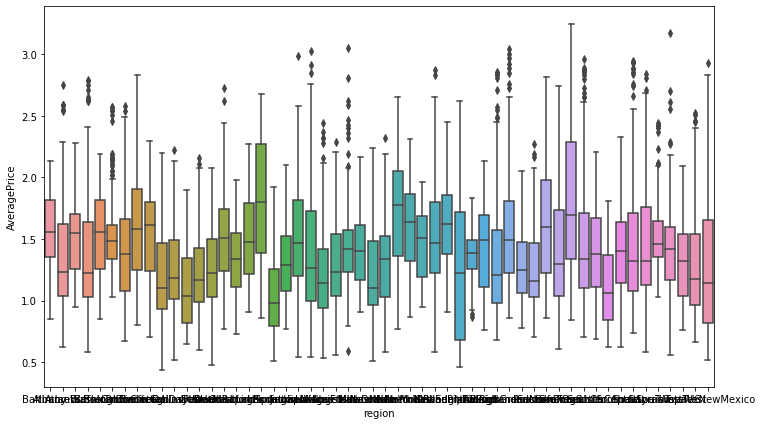

In [35]:
plt.figure(figsize=(12,7))
sns.boxplot(x="region", y="AveragePrice", data=df)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot

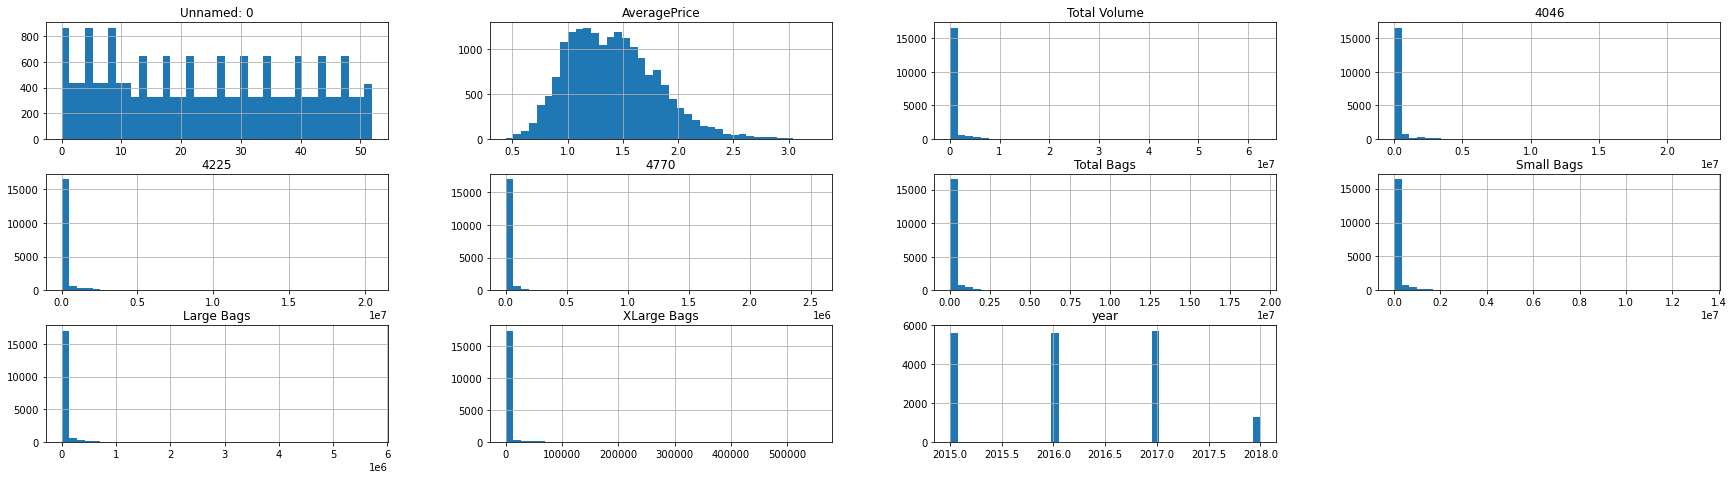

In [37]:
#Histogram : to see the numeric data distribution
df.hist(figsize=(30,30), grid = True, layout = (11,4), bins = 40)

We can see 'Total Volume', '4046','4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags','XLarge Bags' columns are highly positively skewed.

In [38]:
#outliers checking
collist=df.columns.values
ncol=14
nrows=18249
collist

array(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046',
       '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region'], dtype=object)

In [45]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [48]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,RidgeCV,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score,mean_squared_error,r2_score,confusion_matrix,classification_report

In [50]:
#Label Encoder use for "region" column to convert to numerical data
le = LabelEncoder()

In [51]:
df['region'] = le.fit_transform(df['region'])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0


In [52]:
df.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [53]:
#There are two types of avocado - conventional and organic
#Creating dummy variables for type column
df = pd.get_dummies(df, columns=['type'],drop_first=True)
df.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,0
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,0


In [54]:
print("Organic ",df[df["type_organic"]==1]["Date"].count())
print("conventional ",df[df["type_organic"]==0]["Date"].count())

Organic  9123
conventional  9126


# Separating the data

In [55]:
df.drop("Date", axis=1,inplace=True)

In [56]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,53,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,53,1


In [57]:
scaler = StandardScaler().fit(df)
df_std = scaler.transform(df)
df = pd.DataFrame(df_std)

In [58]:
df.columns=["AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags",
            "XLarge Bags","year","region","type_organic"]
cols = [ 'Total Volume', '4046',
       '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type_organic', 'year', 'region'] 

In [59]:
# create a Python list of feature names

x = df[cols]                                    
y = df.AveragePrice


In [90]:
from sklearn.preprocessing import PowerTransformer

In [91]:
pt=PowerTransformer()

In [93]:
x_n=pt.fit_transform(x)

In [94]:
x_n

array([[-0.59926774, -0.70336438, -0.21490713, ..., -0.99983562,
        -1.26709991, -1.70026837],
       [-0.63707692, -0.70815203, -0.31476104, ..., -0.99983562,
        -1.26709991, -1.70026837],
       [-0.39013246, -0.70656065,  0.27624131, ..., -0.99983562,
        -1.26709991, -1.70026837],
       ...,
       [-0.80877709, -0.70131678, -0.78931088, ...,  1.00016441,
         1.8293253 ,  1.70079512],
       [-0.79833226, -0.69689147, -0.78288802, ...,  1.00016441,
         1.8293253 ,  1.70079512],
       [-0.79284425, -0.67893152, -0.79048752, ...,  1.00016441,
         1.8293253 ,  1.70079512]])

In [96]:
pd.DataFrame(x_n,columns = x.columns).skew().sort_values(ascending=False)

XLarge Bags     1.847417
4770            1.461707
4046            1.298569
Large Bags      1.232329
4225            1.095475
Small Bags      1.083940
Total Bags      1.062207
Total Volume    1.056647
year            0.053094
type_organic    0.000329
region          0.000009
dtype: float64

In [97]:
type(x_n)

numpy.ndarray

In [98]:
x=pd.DataFrame(x_n,columns = x.columns)

In [99]:
x.columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type_organic', 'year', 'region'],
      dtype='object')

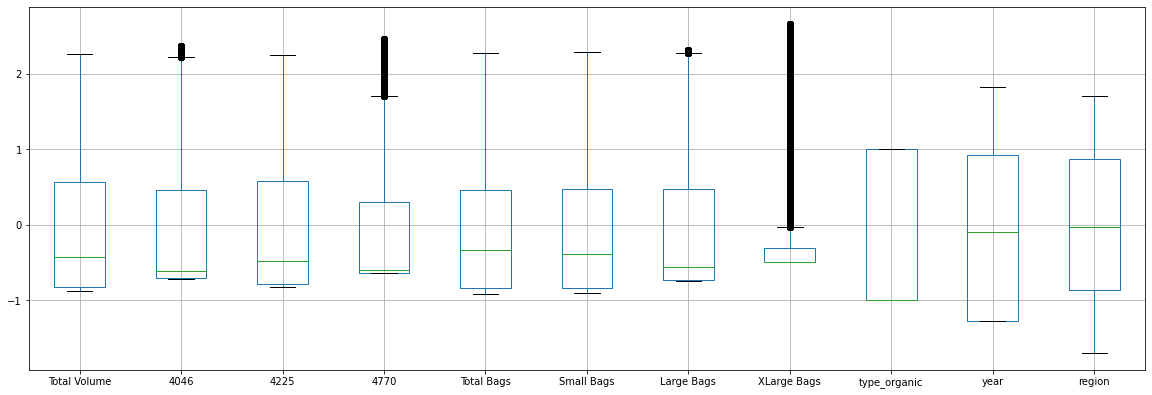

In [101]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

we can see that Xlarge bags and 4770 columns have outliers.

In [102]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all().all()

True

In [106]:
z=np.abs(zscore(x))
threshold=3
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

There are no outliers in the dataset

In [61]:
from sklearn import preprocessing
from sklearn import utils

lab=preprocessing.LabelEncoder()
y = lab.fit_transform(y)
print(y)

[ 86  88  46 ... 140 146 115]


In [107]:
def split(x,y):
    return train_test_split(x, y, test_size=0.20, random_state=1)

x_train, x_test, y_train, y_test=split(x,y)

print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)

print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (14599, 11)
y_train shape:  (14599,)
x_test shape:  (3650, 11)
y_test shape:  (3650,)


# Regression models

In [108]:
def df (model,x_train,y_train):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    cv_score=cross_val_score(model,x_train,y_train, scoring='neg_mean_squared_error',cv=5)
    cv_score=np.abs(np.mean(cv_score))
    print('Model Report')
    print('MSE:',mean_squared_error(y_test,pred))
    print('CV score:',cv_score)
    print("R2 score : %.2f" % r2_score(y_test,pred))
    print('MAE:', mean_absolute_error(y_test,pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test,pred)))

# Linear regression model

Model Report
MSE: 869.5787232430149
CV score: 885.2697506107882
R2 score : 0.46
MAE: 22.576547788399594
RMSE: 29.488620232947742


<AxesSubplot:title={'center':'model coefficient'}>

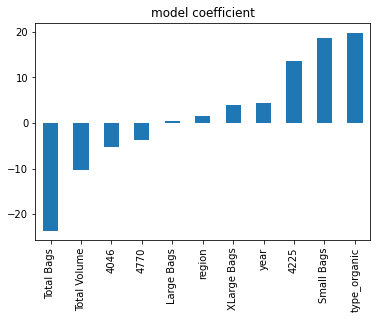

In [109]:
model1=LinearRegression(normalize=True)
df(model1,x_train,y_train)
coef=pd.Series(model1.coef_,x.columns).sort_values()
coef.plot(kind='bar',title='model coefficient')

In [110]:
y_pred_train = model1.predict(x_train)
y_pred_test = model1.predict(x_test)    

In [111]:
print("Model Evaluation for Linear Regression Model ")

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

yhat = model1.predict(x_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("r_squared for train data ",r_squared, "and adjusted_r_squared for train data",adjusted_r_squared)

yhat = model1.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("r_squared for test data ",r_squared, "and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Linear Regression Model 
RMSE for training set is 29.726655311612593  and RMSE for test set is 29.488620232947742
r_squared for train data  0.4542922794611085 and adjusted_r_squared for train data 0.4538807633902284
r_squared for test data  0.464608014880206 and adjusted_r_squared for test data 0.46298918259974475


# 2. Random Forest regressor

Model Report
MSE: 228.59203167123286
CV score: 268.4600341463839
R2 score : 0.86
MAE: 10.589901369863016
RMSE: 15.11926028849404


<AxesSubplot:title={'center':'Feature Importance'}>

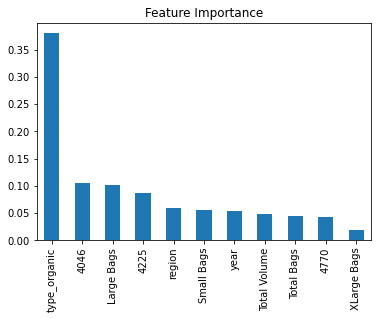

In [112]:
model2=RandomForestRegressor()
df(model2,x_train,y_train)
coef=pd.Series(model2.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

In [113]:
print("Model Evaluation for Random forest regressor Model ")

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

yhat = model2.predict(x_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("r_squared for train data ",r_squared, "and adjusted_r_squared for train data",adjusted_r_squared)

yhat = model2.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("r_squared for test data ",r_squared, "and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Random forest regressor Model 
RMSE for training set is 29.726655311612593  and RMSE for test set is 29.488620232947742
r_squared for train data  0.9782209468301425 and adjusted_r_squared for train data 0.9782045233308028
r_squared for test data  0.8592578931064465 and adjusted_r_squared for test data 0.858832339732112


# 3. Decision Tree regressor model

Model Report
MSE: 478.0608219178082
CV score: 550.4882725365695
R2 score : 0.71
MAE: 14.178082191780822
RMSE: 21.864602029714792


<AxesSubplot:title={'center':'Feature Importance'}>

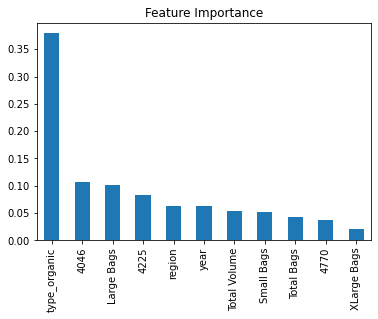

In [114]:
from sklearn.tree import DecisionTreeRegressor
model3=DecisionTreeRegressor()
df(model3,x_train,y_train)
coef=pd.Series(model3.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

In [115]:
print("Model Evaluation for Decision Tree regressor Model ")

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

yhat = model3.predict(x_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("r_squared for train data ",r_squared, "and adjusted_r_squared for train data",adjusted_r_squared)

yhat = model3.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("r_squared for test data ",r_squared, "and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Decision Tree regressor Model 
RMSE for training set is 29.726655311612593  and RMSE for test set is 29.488620232947742
r_squared for train data  1.0 and adjusted_r_squared for train data 1.0
r_squared for test data  0.7056621492531076 and adjusted_r_squared for test data 0.7047721777417782


# 4. Lasso regressor model

Model Report
MSE: 1624.2102301457412
CV score: 1620.1319162706686
R2 score : -0.00
MAE: 32.47804869352095
RMSE: 40.30149166154698


<AxesSubplot:title={'center':'model coefficient'}>

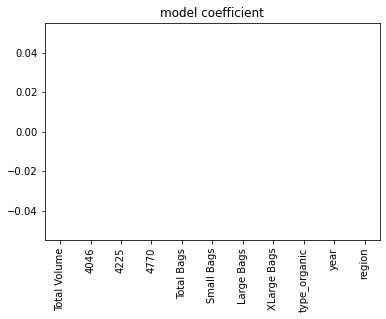

In [116]:
model4=Lasso(normalize=True)
df(model4,x_train,y_train)
coef=pd.Series(model4.coef_,x.columns).sort_values()
coef.plot(kind='bar',title='model coefficient')

In [117]:
print("Model Evaluation for Lasso regressor Model ")

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

yhat = model4.predict(x_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("r_squared for train data ",r_squared, "and adjusted_r_squared for train data",adjusted_r_squared)

yhat = model4.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("r_squared for test data ",r_squared, "and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Lasso regressor Model 
RMSE for training set is 29.726655311612593  and RMSE for test set is 29.488620232947742
r_squared for train data  0.0 and adjusted_r_squared for train data -0.0007540961129772761
r_squared for test data  -1.1978359536479743e-05 and adjusted_r_squared for test data -0.003035653940062888


# 5. Extra Tree regressor model

Model Report
MSE: 192.15267093150686
CV score: 222.03826235485977
R2 score : 0.88
MAE: 9.54445205479452
RMSE: 13.861914403555767


<AxesSubplot:title={'center':'Feature Importance'}>

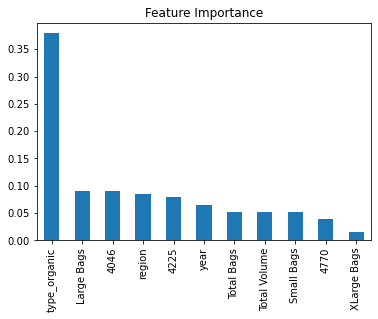

In [118]:
from sklearn.ensemble import ExtraTreesRegressor
model5=ExtraTreesRegressor()
df(model5,x_train,y_train)
coef=pd.Series(model5.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance') 

In [119]:
print("Model Evaluation for Extra Tree regressor Model ")

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

yhat = model5.predict(x_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("r_squared for train data ",r_squared, "and adjusted_r_squared for train data",adjusted_r_squared)

yhat = model5.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("r_squared for test data ",r_squared, "and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Extra Tree regressor Model 
RMSE for training set is 29.726655311612593  and RMSE for test set is 29.488620232947742
r_squared for train data  0.9999999997461974 and adjusted_r_squared for train data 0.999999999746006
r_squared for test data  0.8816932875813484 and adjusted_r_squared for test data 0.8813355707488566


All in all extra tree regressor model is the best model as r_squared for training is 99.9% and testing is 88.5% and RMSE is also very low.

# Classification

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
def df (model,x_train,y_train):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    cv_score=cross_val_score(model,x_train,y_train, scoring='neg_mean_squared_error',cv=5)
    cv_score=np.abs(np.mean(cv_score))
    print('Model Report')
    print('CV score:',cv_score)
    print("R2 score : %.2f" % r2_score(y_test,pred))
    print('MAE:', mean_absolute_error(y_test,pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test,pred)))
    result_acc = accuracy_score(y_test,pred) 
    print('accuracy score:',result_acc)

Model Report
CV score: 345.13157494356767
R2 score : 0.81
MAE: 11.042465753424658
RMSE: 17.436232155509455
accuracy score: 0.06356164383561644


<AxesSubplot:title={'center':'Feature Importance'}>

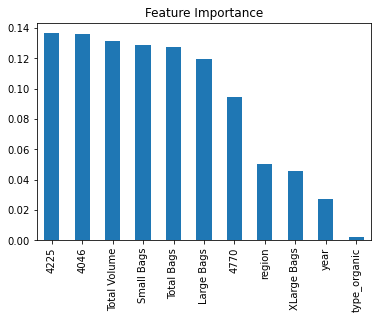

In [122]:
model_1 = RandomForestClassifier()
df(model_1,x_train,y_train)
coef=pd.Series(model_1.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

In [127]:
print("Model Evaluation for Random forest classifier Model ")

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

yhat = model_1.predict(x_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("r_squared for train data ",r_squared, "and adjusted_r_squared for train data",adjusted_r_squared)

yhat = model_1.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("r_squared for test data ",r_squared, "and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Random forest classifier Model 
RMSE for training set is 29.726655311612593  and RMSE for test set is 29.488620232947742
r_squared for train data  1.0 and adjusted_r_squared for train data 1.0
r_squared for test data  0.8128162057933463 and adjusted_r_squared for test data 0.8122502295052009


In [123]:
from sklearn.tree import DecisionTreeClassifier

Model Report
CV score: 737.914986296677
R2 score : 0.59
MAE: 16.695068493150686
RMSE: 25.693957500836543
accuracy score: 0.04328767123287671


<AxesSubplot:title={'center':'Feature Importance'}>

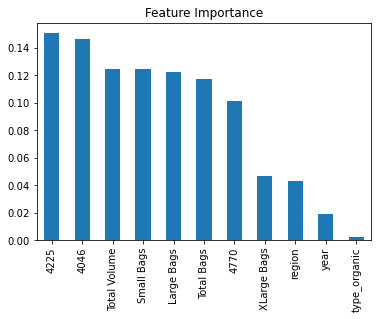

In [124]:
model_2=DecisionTreeClassifier()
df(model_2,x_train,y_train)
coef=pd.Series(model_2.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

In [128]:
print("Model Evaluation for Decision tree classifier Model ")

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

yhat = model_2.predict(x_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("r_squared for train data ",r_squared, "and adjusted_r_squared for train data",adjusted_r_squared)

yhat = model_2.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("r_squared for test data ",r_squared, "and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Decision tree classifier Model 
RMSE for training set is 29.726655311612593  and RMSE for test set is 29.488620232947742
r_squared for train data  1.0 and adjusted_r_squared for train data 1.0
r_squared for test data  0.5935333076541511 and adjusted_r_squared for test data 0.5923042989637157


Random forest classifier is better than decision tree classifier

In [126]:
import pickle
filename = 'avacado_regressor.pkl'
pickle.dump(model5,open(filename,'wb'))

In [129]:
import pickle
filename = 'hr_analytics.pkl'
pickle.dump(model_2,open(filename,'wb'))

Conclusion:
I came to know through analysis which model will be work with better accuracy with the help of low residual and RMSE scores.
This project helped me to gain insights and how I should go with flow, which model to choose first and go step by step to attain results with good accuracy. Also get to know where to use Linear, Decision Tree and other applicable and required models to fine tune the predictions.

-HartfordSpringfield
-SanFrancisco
-NewYork
-Philadelphia
-Sacramento
These are the regions which have high price of avocados.
Most Average price lies range from 1.0 to 1.7.